# Activity 3 - Clustering

In this example we show a method of k-means clustering. The idea is that we inform the system of how many clusters we want (e.g., 3). The system generates k random points that we use as our group centroids. For each point in our data, we then see which group the point is closest to, and we assign it to that group. Once we have considered all points, we then update the position of the centroid, so that it is at the mean of the selected points. We then repeat this process, of measuring distance to the centroids and updating our centroids. We do this until the centroids are positioned such that they no longer move (i.e., we have found our clusters).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Generate some sample data

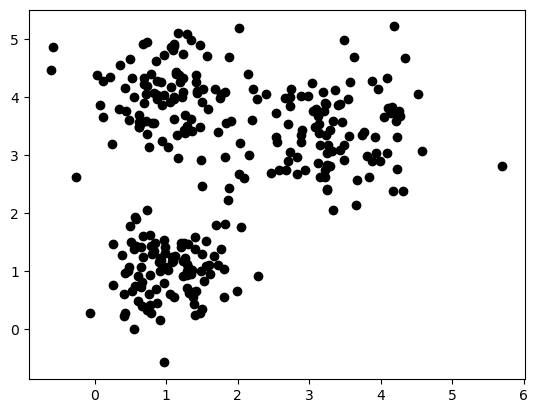

In [2]:
# We will define three clusters where we know the "ground truth" of how the data was constructed

cluster1 = np.random.normal(0.0,0.5,[100,2])
cluster1[:,0] = cluster1[:,0] + 1.0
cluster1[:,1] = cluster1[:,1] + 1.0

cluster2 = np.random.normal(0.0,0.6,[100,2])
cluster2[:,0] = cluster2[:,0] + 1.0
cluster2[:,1] = cluster2[:,1] + 4.0

cluster3 = np.random.normal(0.0,0.7,[100,2])
cluster3[:,0] = cluster3[:,0] + 3.5
cluster3[:,1] = cluster3[:,1] + 3.5

# We will then stack this data together so that it 'appears' all together

all_data = np.vstack([cluster1, cluster2, cluster3])
plt.scatter(all_data[:,0], all_data[:,1], color='k')

## Defining ***k***

***k*** is the number of clusters that we wish to discover. We may either know ***k***, or have some expectation of ***k*** - or, we may have to try different values of ***k*** to see how the results compare.

For our example, we will say that ***k*** = 3

In [3]:
k = 3

## Generate ***k*** initial centroid points

Here we essentially generate ***k*** randomised centroid points - i.e., a random value of x and a random value of y, for each of our  centroid points.

In [4]:
def generate_initial_points(k):
    centroids = []
    for i in range(k):
        c = [1+np.random.random()*4, 1+np.random.random()*4]
        centroids.append(c)
    centroids = np.array(centroids)
    return centroids

centroids = generate_initial_points(k)
centroids

array([[4.26742135, 1.47089306],
       [2.11952411, 4.9926165 ],
       [3.06167256, 1.83823585]])

## Plotting our data

We can use a scatter plot to show all of our data, along with the ***k*** centroid points.

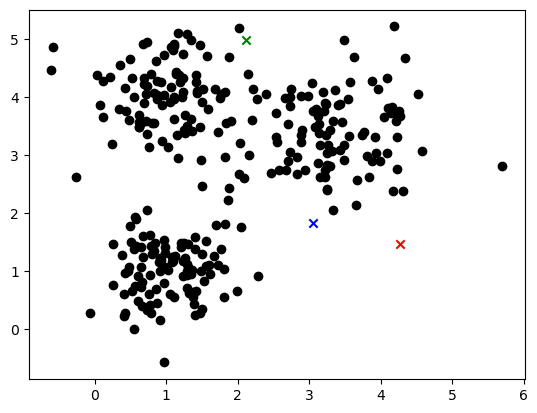

In [5]:
plt.scatter(all_data[:,0], all_data[:,1], color='k')
plt.scatter(centroids[0,0], centroids[0,1], marker='x', color='r')
plt.scatter(centroids[1,0], centroids[1,1], marker='x', color='g')
plt.scatter(centroids[2,0], centroids[2,1], marker='x', color='b')

## First pass of the algorithm

Here, we will assess each point in the data by measuring the distance between each point and each of the ***k*** centroids. We assign each data point to a class as denoted by the group colour.

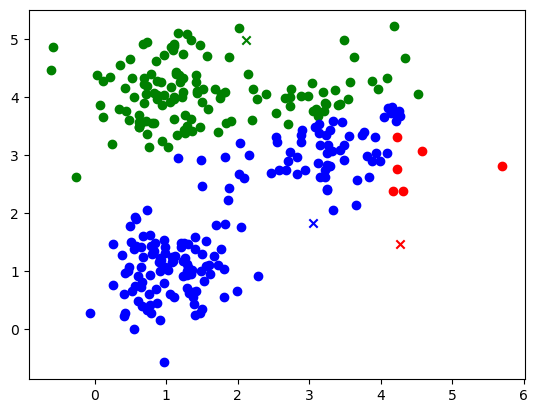

In [6]:
group1 = []
group2 = []
group3 = []
    
def find_groups(centroids, all_data):
    group1 = []
    group2 = []
    group3 = []
    for i in range(all_data.shape[0]):
        distance1 = np.sqrt(np.abs(all_data[i, 0] - centroids[0,0]) ** 2 + np.abs(all_data[i, 1] - centroids[0,1]) ** 2)
        distance2 = np.sqrt(np.abs(all_data[i, 0] - centroids[1,0]) ** 2 + np.abs(all_data[i, 1] - centroids[1,1]) ** 2)
        distance3 = np.sqrt(np.abs(all_data[i, 0] - centroids[2,0]) ** 2 + np.abs(all_data[i, 1] - centroids[2,1]) ** 2)
        distances = [distance1, distance2, distance3]
        #print (distances)
        if np.argmin(distances) == 0:
            group1.append([all_data[i, 0], all_data[i, 1]])
        elif np.argmin(distances) == 1:
            group2.append([all_data[i, 0], all_data[i, 1]])
        elif np.argmin(distances) == 2:
            group3.append([all_data[i, 0], all_data[i, 1]])
    group1 = np.array(group1)
    group2 = np.array(group2)
    group3 = np.array(group3)
    return group1, group2, group3
            
group1, group2, group3 = find_groups(centroids, all_data)

#print ("group 1:", group1)
#print ("group 2:", group2)
#print ("group 3:", group3)

plt.scatter(group1[:,0], group1[:,1], color='r')
plt.scatter(group2[:,0], group2[:,1], color='g')
plt.scatter(group3[:,0], group3[:,1], color='b')

plt.scatter(centroids[0,0], centroids[0,1], marker='x', color='r')
plt.scatter(centroids[1,0], centroids[1,1], marker='x', color='g')
plt.scatter(centroids[2,0], centroids[2,1], marker='x', color='b')

## Update our centroids

Now that the data has been labelled against potential grroup membership, we update each centroid position, based on the mean values denoted by the data in each group.

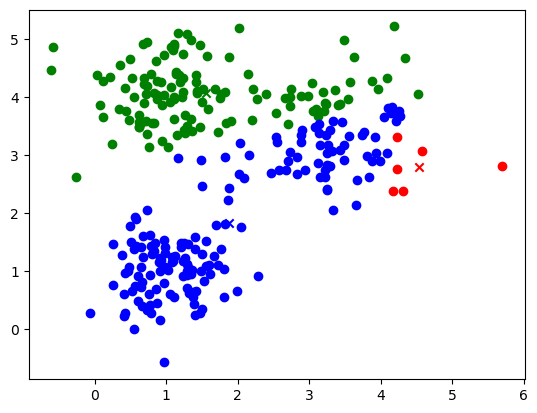

In [7]:
centroids = np.array([np.mean(group1, axis=0), np.mean(group2, axis=0), np.mean(group3, axis=0)])

plt.scatter(group1[:,0], group1[:,1], color='r')
plt.scatter(group2[:,0], group2[:,1], color='g')
plt.scatter(group3[:,0], group3[:,1], color='b')

plt.scatter(centroids[0,0], centroids[0,1], marker='x', color='r')
plt.scatter(centroids[1,0], centroids[1,1], marker='x', color='g')
plt.scatter(centroids[2,0], centroids[2,1], marker='x', color='b')

plt.show()

## Second pass of the algorithm

Here, we repeat ourselves - for each point in the data, find which k marker is closest. If we are not at our optimal solution yet then this should give a different result to the one observed in our first pass.

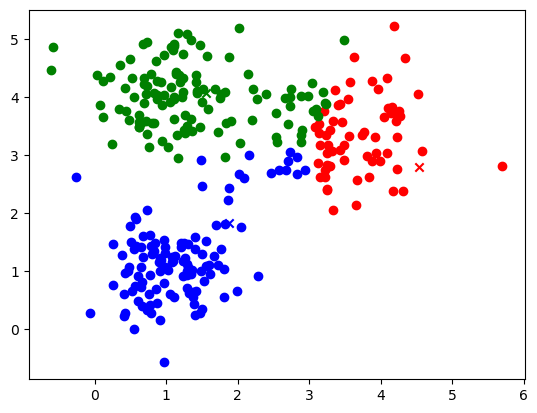

In [8]:
all_data = np.vstack([group1, group2, group3])
group1, group2, group3 = find_groups(centroids, all_data)

plt.scatter(group1[:,0], group1[:,1], color='r')
plt.scatter(group2[:,0], group2[:,1], color='g')
plt.scatter(group3[:,0], group3[:,1], color='b')

plt.scatter(centroids[0,0], centroids[0,1], marker='x', color='r')
plt.scatter(centroids[1,0], centroids[1,1], marker='x', color='g')
plt.scatter(centroids[2,0], centroids[2,1], marker='x', color='b')

plt.show()

## Update our centroids

Just as we did earlier, we update our centroids again. By now you should be able to see the updating cycle - for each data point find which k marker is closest, and then update the k marker position based on the group membership.

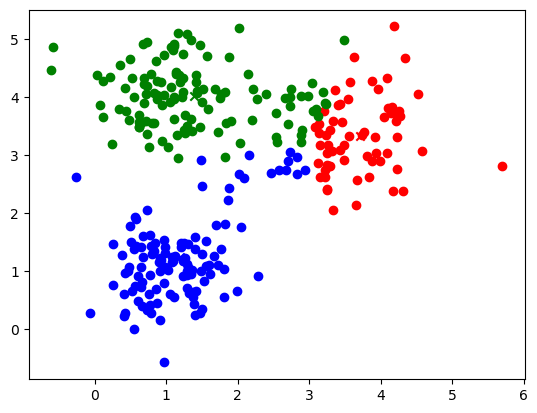

In [9]:
centroids = np.array([np.mean(group1, axis=0), np.mean(group2, axis=0), np.mean(group3, axis=0)])

plt.scatter(group1[:,0], group1[:,1], color='r')
plt.scatter(group2[:,0], group2[:,1], color='g')
plt.scatter(group3[:,0], group3[:,1], color='b')

plt.scatter(centroids[0,0], centroids[0,1], marker='x', color='r')
plt.scatter(centroids[1,0], centroids[1,1], marker='x', color='g')
plt.scatter(centroids[2,0], centroids[2,1], marker='x', color='b')

plt.show()

## Third pass of the algorithm

We run a third pass of the algorithm, however at this point, we would likely have converged to a solution. Nevertheless, the run the algorithm again to validate this (essentially to check that the update distance of each k marker is zero - i.e., they do not move again).

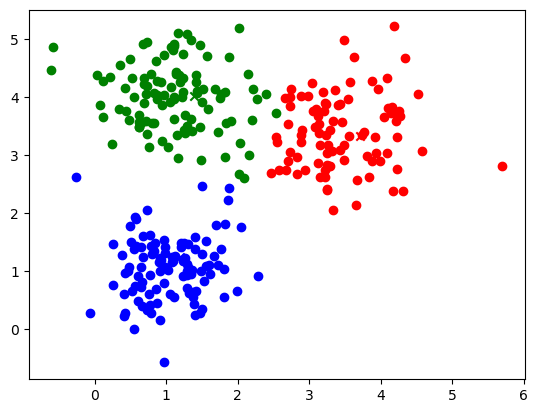

In [10]:
all_data = np.vstack([group1, group2, group3])
group1, group2, group3 = find_groups(centroids, all_data)

plt.scatter(group1[:,0], group1[:,1], color='r')
plt.scatter(group2[:,0], group2[:,1], color='g')
plt.scatter(group3[:,0], group3[:,1], color='b')

plt.scatter(centroids[0,0], centroids[0,1], marker='x', color='r')
plt.scatter(centroids[1,0], centroids[1,1], marker='x', color='g')
plt.scatter(centroids[2,0], centroids[2,1], marker='x', color='b')

plt.show()

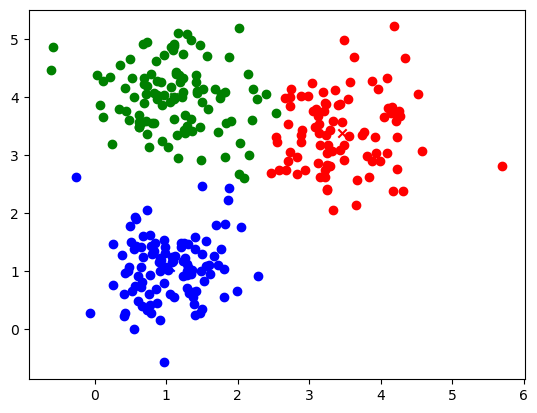

In [11]:
centroids = np.array([np.mean(group1, axis=0), np.mean(group2, axis=0), np.mean(group3, axis=0)])

plt.scatter(group1[:,0], group1[:,1], color='r')
plt.scatter(group2[:,0], group2[:,1], color='g')
plt.scatter(group3[:,0], group3[:,1], color='b')

plt.scatter(centroids[0,0], centroids[0,1], marker='x', color='r')
plt.scatter(centroids[1,0], centroids[1,1], marker='x', color='g')
plt.scatter(centroids[2,0], centroids[2,1], marker='x', color='b')

plt.show()

## Result

Above we have found our solution, and have identified the three original clusters of the data. Try editing this notebook to see how the algorithm performs when different data distributions are provided, or when different values of k are used.

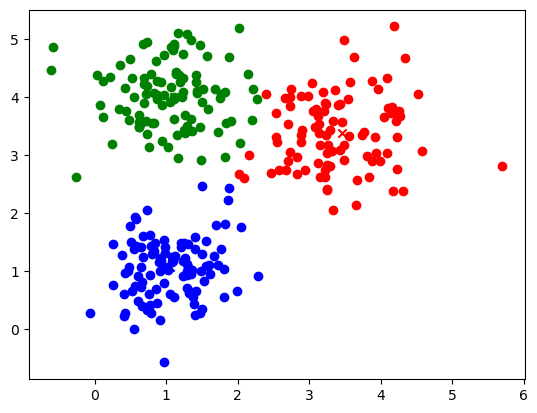

In [12]:
all_data = np.vstack([group1, group2, group3])
group1, group2, group3 = find_groups(centroids, all_data)

plt.scatter(group1[:,0], group1[:,1], color='r')
plt.scatter(group2[:,0], group2[:,1], color='g')
plt.scatter(group3[:,0], group3[:,1], color='b')

plt.scatter(centroids[0,0], centroids[0,1], marker='x', color='r')
plt.scatter(centroids[1,0], centroids[1,1], marker='x', color='g')
plt.scatter(centroids[2,0], centroids[2,1], marker='x', color='b')

plt.show()

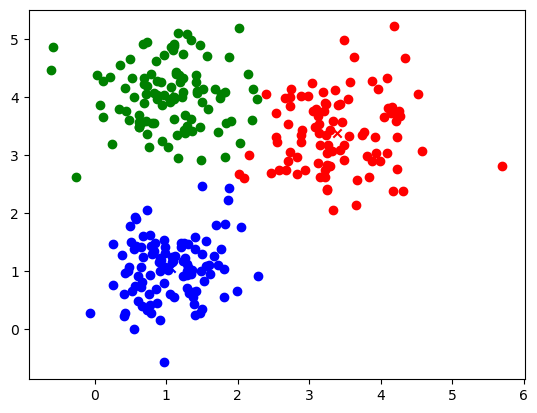

In [13]:
centroids = np.array([np.mean(group1, axis=0), np.mean(group2, axis=0), np.mean(group3, axis=0)])

plt.scatter(group1[:,0], group1[:,1], color='r')
plt.scatter(group2[:,0], group2[:,1], color='g')
plt.scatter(group3[:,0], group3[:,1], color='b')

plt.scatter(centroids[0,0], centroids[0,1], marker='x', color='r')
plt.scatter(centroids[1,0], centroids[1,1], marker='x', color='g')
plt.scatter(centroids[2,0], centroids[2,1], marker='x', color='b')

plt.show()

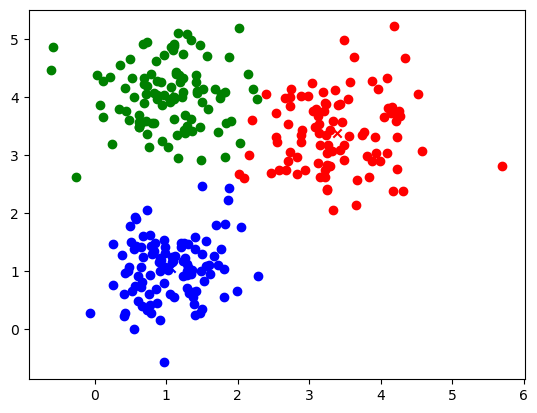

In [14]:
all_data = np.vstack([group1, group2, group3])
group1, group2, group3 = find_groups(centroids, all_data)

plt.scatter(group1[:,0], group1[:,1], color='r')
plt.scatter(group2[:,0], group2[:,1], color='g')
plt.scatter(group3[:,0], group3[:,1], color='b')

plt.scatter(centroids[0,0], centroids[0,1], marker='x', color='r')
plt.scatter(centroids[1,0], centroids[1,1], marker='x', color='g')
plt.scatter(centroids[2,0], centroids[2,1], marker='x', color='b')

plt.show()

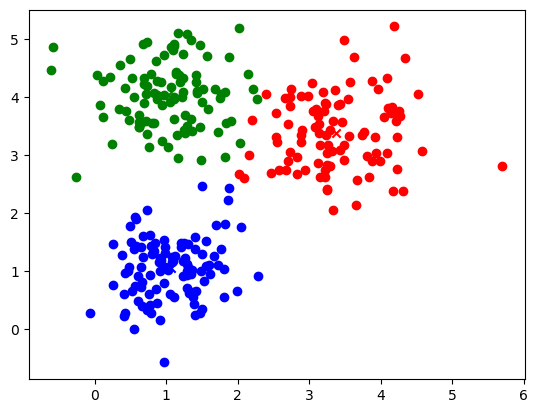

In [15]:
centroids = np.array([np.mean(group1, axis=0), np.mean(group2, axis=0), np.mean(group3, axis=0)])

plt.scatter(group1[:,0], group1[:,1], color='r')
plt.scatter(group2[:,0], group2[:,1], color='g')
plt.scatter(group3[:,0], group3[:,1], color='b')

plt.scatter(centroids[0,0], centroids[0,1], marker='x', color='r')
plt.scatter(centroids[1,0], centroids[1,1], marker='x', color='g')
plt.scatter(centroids[2,0], centroids[2,1], marker='x', color='b')

plt.show()

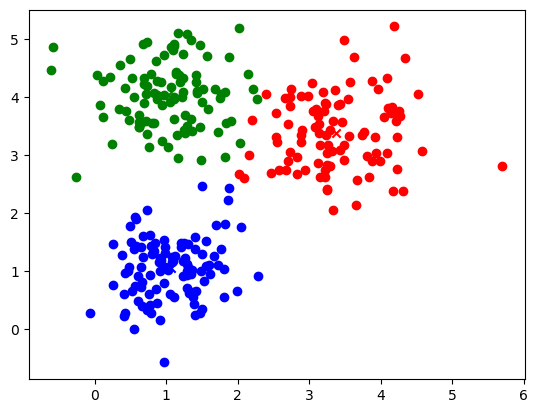

In [16]:
all_data = np.vstack([group1, group2, group3])
group1, group2, group3 = find_groups(centroids, all_data)

plt.scatter(group1[:,0], group1[:,1], color='r')
plt.scatter(group2[:,0], group2[:,1], color='g')
plt.scatter(group3[:,0], group3[:,1], color='b')

plt.scatter(centroids[0,0], centroids[0,1], marker='x', color='r')
plt.scatter(centroids[1,0], centroids[1,1], marker='x', color='g')
plt.scatter(centroids[2,0], centroids[2,1], marker='x', color='b')

plt.show()

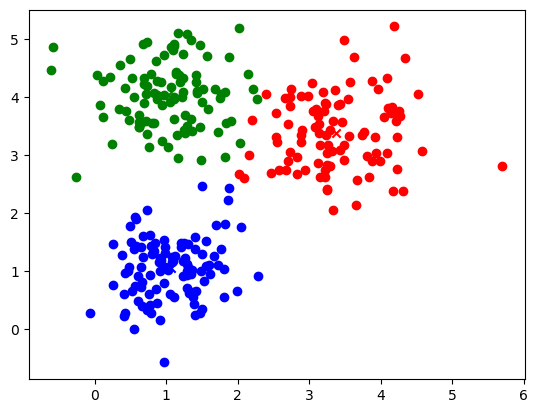

In [17]:
centroids = np.array([np.mean(group1, axis=0), np.mean(group2, axis=0), np.mean(group3, axis=0)])

plt.scatter(group1[:,0], group1[:,1], color='r')
plt.scatter(group2[:,0], group2[:,1], color='g')
plt.scatter(group3[:,0], group3[:,1], color='b')

plt.scatter(centroids[0,0], centroids[0,1], marker='x', color='r')
plt.scatter(centroids[1,0], centroids[1,1], marker='x', color='g')
plt.scatter(centroids[2,0], centroids[2,1], marker='x', color='b')

plt.show()